***Machine learning linear regression, Logistic regression and Ridge regression.***

"This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error




from sklearn.metrics import confusion_matrix , classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
credit = pd.read_csv('dpnm.csv')

FileNotFoundError: ignored

In [ ]:
credit.head()

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
credit.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

In [ ]:
# count the duplicated cases
credit.duplicated().sum()

35

In [ ]:
credit = credit.drop_duplicates()

In [ ]:
credit['dpnm'].value_counts()

0    23335
1     6630
Name: dpnm, dtype: int64

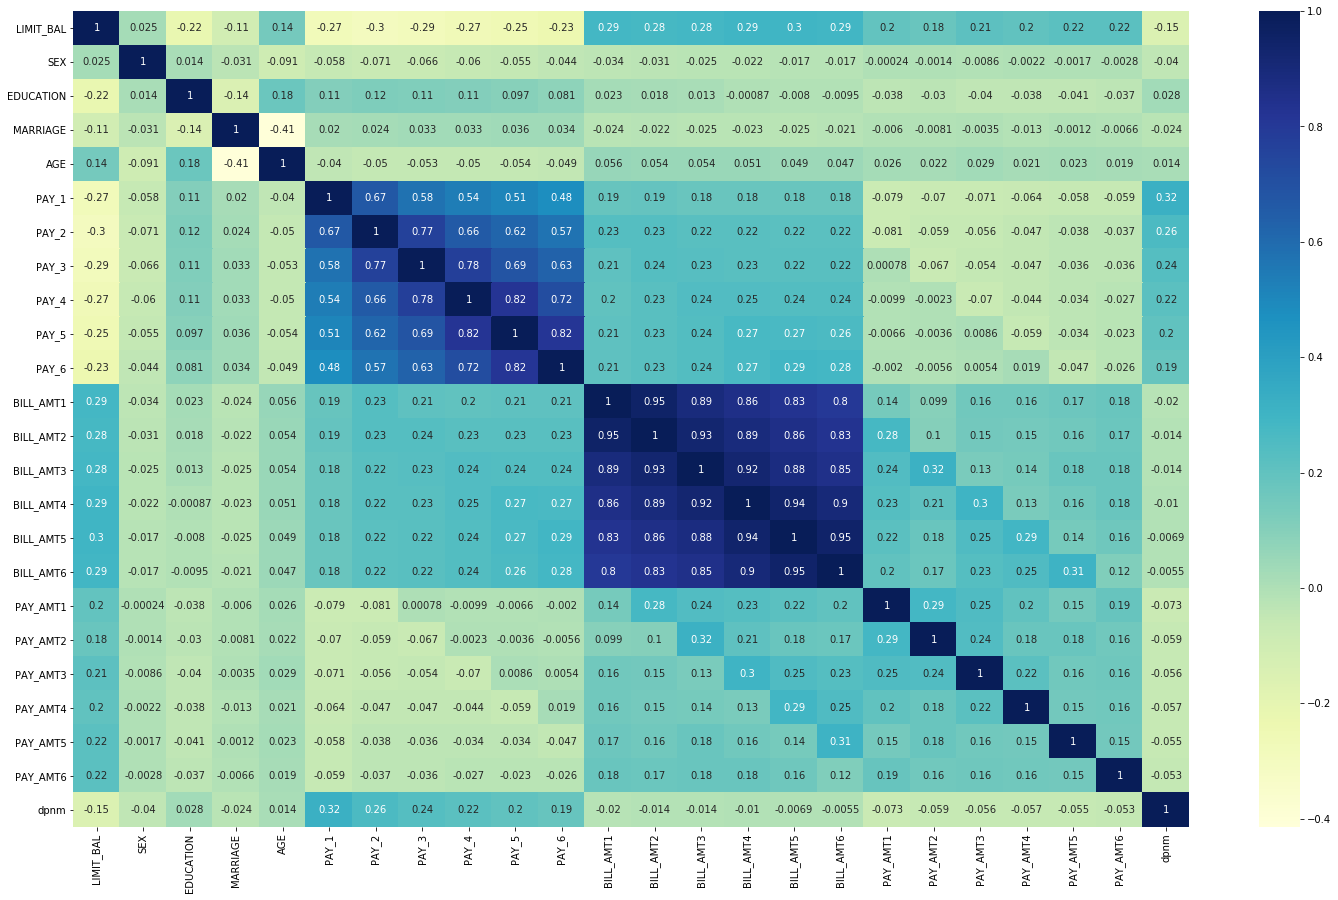

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(credit.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [ ]:
# X2: Gender (1 = male; 2 = female)
credit['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

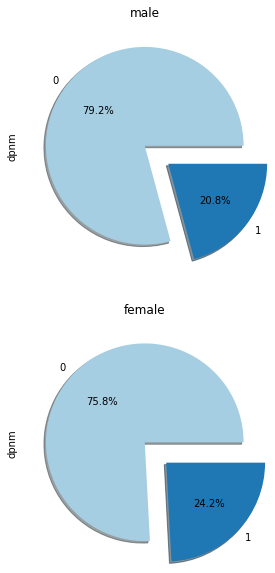

In [ ]:
# X2: Gender (1 = male; 2 = female)
# dpnm = 0 or 1
sns.set_palette("Paired")
f, ax = plt.subplots(2,figsize=(10,10))
gender=credit['SEX'].unique()
list=['male','female']
i=0
for g in gender :
  data = credit[credit['SEX']==g]
  data = data['dpnm'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i])   
  ax[i].set_title(list[i])
  i+=1

In [ ]:
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

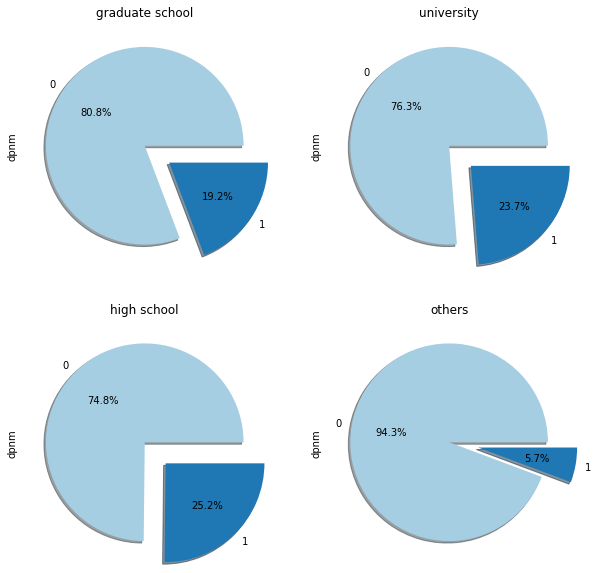

In [ ]:
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
Edu=[1,2,3,4]
list = ['graduate school','university','high school','others']
i=0
j=0
for e in Edu :
  data = credit[credit['EDUCATION']==e]
  data = data['dpnm'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])   
  #data.plot.pie ()
  ax[i][j].set_title(list[e-1])
  j+=1
  if j%2 == 0:
    i+=1
    j=0

In [ ]:
# X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

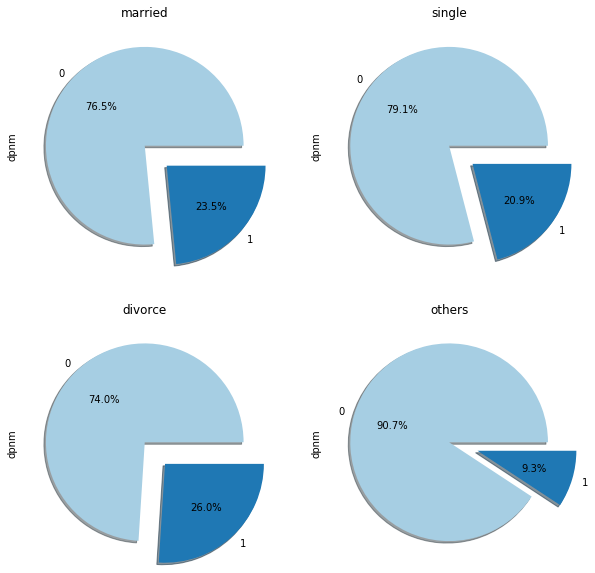

In [ ]:
# X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
m_status=credit['MARRIAGE'].unique()
list=['married','single','divorce', 'others']
i=0
j=0
for m in m_status :
  data = credit[credit['MARRIAGE']==m]
  data = data['dpnm'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])
  ax[i][j].set_title(list[m-1])
  j+=1
  if j%2 == 0:
    i+=1
    j=0

In [ ]:
print(credit.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')


In [ ]:
labeled = credit.copy()
labeled['MARRIAGE'] = labeled['MARRIAGE'].replace([0,1,2,3],['others','married','single','divorce'])
labeled['EDUCATION'] = labeled['EDUCATION'].replace([1,2,3,4],['graduate school', 'university' , 'high school','others'])
labeled['SEX'] = labeled['SEX'].replace([1,2],["Male", "Female"])

In [ ]:
# removing outlier
# cred = credit[(credit['AGE']<=60) & (credit['PAY_1']<=2) & (credit['PAY_2']<=2) & (credit['PAY_3']<=2) & (credit['PAY_4']<=2) & (credit['PAY_5']<=2) & (credit['PAY_6']<=2) & (credit['LIMIT_BAL']<=600000)  ]

In [ ]:
# only 22 %
credit['dpnm'].value_counts()

0    23335
1     6630
Name: dpnm, dtype: int64

In [ ]:
x=credit.drop("dpnm", axis=1)
x = (x-x.mean())/x.std()
y = credit["dpnm"].values

In [ ]:
# sm = SMOTE(random_state=42) # 15000/23335
# x_res, y_res = sm.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(credit.drop("dpnm", axis=1),credit["dpnm"].values ,test_size= 0.2, random_state = 42)

In [ ]:
x_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29334,100000,1,1,2,27,0,0,0,0,0,...,11372,12092,12429,22315,1171,1303,1023,360,10000,442
24426,150000,1,1,1,40,-2,-1,-1,-1,0,...,1003,35206,36003,16854,1003,1003,35206,2000,18158,189000
9822,20000,1,3,2,49,0,0,0,-1,0,...,-391,19413,12223,2110,1200,160,20394,347,2110,12996
20887,420000,1,1,1,39,0,0,0,0,0,...,105030,107146,107896,110149,5138,5267,5347,4019,4152,4173
21692,100000,2,5,2,27,0,0,0,0,0,...,60734,48816,28679,30231,3000,2231,1617,1000,2000,590


In [ ]:
logr=LogisticRegression(solver='liblinear',random_state=42)
logr.fit(x_train,y_train)
print(logr.score(x_train,y_train))
print(logr.score(x_test,y_test))

0.7784081428333055
0.779743033539129


In [ ]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(solver='lbfgs', max_iter=8000)
LRModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=8000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_dpnm=LRModel.predict(x_test) #threshold

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test,predictions_dpnm))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.50      0.00      0.00      1320

    accuracy                           0.78      5993
   macro avg       0.64      0.50      0.44      5993
weighted avg       0.72      0.78      0.68      5993



In [ ]:

x=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
   'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

data=[120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000]
id_54=pd.DataFrame([data],columns=x)
